In [4]:
# Importing modules
import matplotlib.pyplot as plot;
import numpy as np;

In [5]:
# Newton Raphson method (2D)
def NewtonRaphson2D(f1, f2, jacobian, x0, y0, rootRange, maxCount):
    x, y = x0, y0;

    for i in range(maxCount):
        jacob = jacobian(x, y);
        f = np.array([f1(x, y), f2(x, y)]);
        d = np.linalg.solve(jacob, f);
        
        newX, newY = x - d[0], y - d[1];
        
        if (np.linalg.norm([newX - x], [newY - y])) <= rootRange: 
            return np.array([newX, newY]);
        
        x, y = newX, newY;
        
    return None;

In [6]:
def f1(x, y): return x ** 2 + y ** 2 - 4;
def f2(x, y): return np.exp(x) + y - 1;

# Jacobian, returns array with gradient vector of both functions.
def Jacobian(x, y): return np.array([[2 * x, 2 * y], [np.exp(x), 1]]);

In [7]:
roots = NewtonRaphson2D(f1, f2, Jacobian, 10, 10, 1e-6, 100);
print(roots);

[ 1.00416874 -1.72963729]


In [8]:
def Plot(functions, start, end, numPoints):
    xVals, yVals = np.linspace(start, end, numPoints), np.linspace(start, end, numPoints);

    x, y = np.meshgrid(xVals, yVals);
    
    fig = plot.figure();
    ax = fig.add_subplot(111, projection="3d");

    for f in functions:
        z = f(x, y); ax.contour(x, y, z, cmap="plasma", levels=50, alpha=0.5); 

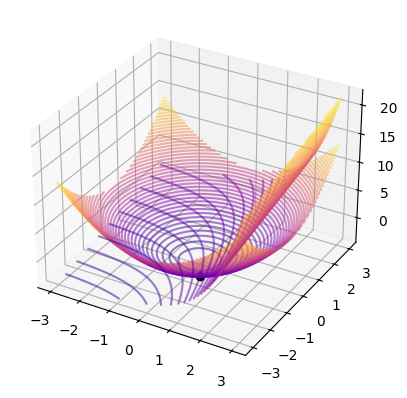

In [9]:
start, end = -3, 3;
numPoints  = 100;

Plot([f1, f2], start, end, numPoints);
plot.plot(roots[0], roots[1], color="k", marker="o");